<a href="https://colab.research.google.com/github/gityangwoo/DL_user_sleep_classifier/blob/main/17_EfficientNetB3_TL_from_middle_layer_epoch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets

In [ ]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!nvidia-smi

Tue Apr 18 05:50:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
batch_size = 4
img_height = 300
img_width = 300

In [ ]:
dataset_path = '/content/drive/MyDrive/ZB/DL_project_2/temp_data/Training'
train_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    # validation_split=0.2,
    # subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 84914 files belonging to 5 classes.


In [ ]:
dataset_path = '/content/drive/MyDrive/ZB/DL_project_2/temp_data/Validation'
val_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    # validation_split=0.2,
    # subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 12231 files belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB3
base_model = EfficientNetB3(include_top=False, weights='imagenet' )

43941136/43941136 [==============================] - 2s 0us/step


In [ ]:
print(len(base_model.layers))

385


In [ ]:
for i in base_model.layers[350:]:
    i.trainable = True

In [ ]:
inputs = Input(shape=(300,300,3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = tf.keras.layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = tf.keras.layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = tf.keras.layers.Dense(5, activation="softmax", name="pred")(x)

model_Effi = tf.keras.Model(inputs, outputs)

In [ ]:
model_Effi.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model_Effi.fit(
                    train_x,
                    validation_data=val_x,
                    epochs=5,
                    callbacks = [early])

Epoch 1/5
21229/21229 [==============================] - 14837s 695ms/step - loss: 1.1601 - accuracy: 0.5810 - val_loss: 0.5533 - val_accuracy: 0.8469
Epoch 2/5
21229/21229 [==============================] - 2715s 128ms/step - loss: 0.2978 - accuracy: 0.9114 - val_loss: 0.3936 - val_accuracy: 0.8980
Epoch 3/5
21229/21229 [==============================] - 2748s 129ms/step - loss: 0.1770 - accuracy: 0.9495 - val_loss: 0.5332 - val_accuracy: 0.8617
Epoch 4/5
21229/21229 [==============================] - 2743s 129ms/step - loss: 0.1385 - accuracy: 0.9602 - val_loss: 0.2548 - val_accuracy: 0.9377
Epoch 5/5
21229/21229 [==============================] - 2752s 130ms/step - loss: 0.1174 - accuracy: 0.9662 - val_loss: 0.2571 - val_accuracy: 0.9312


In [ ]:
import h5py
model_Effi.save_weights('EfficientNetB3_Transer_Learning_from_300th_layer_epoch5.h5')
# model = tf.keras.models.load_weights('./EfficientNetB0_Transer_Learning_from_200th_layer_224X224')
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy)

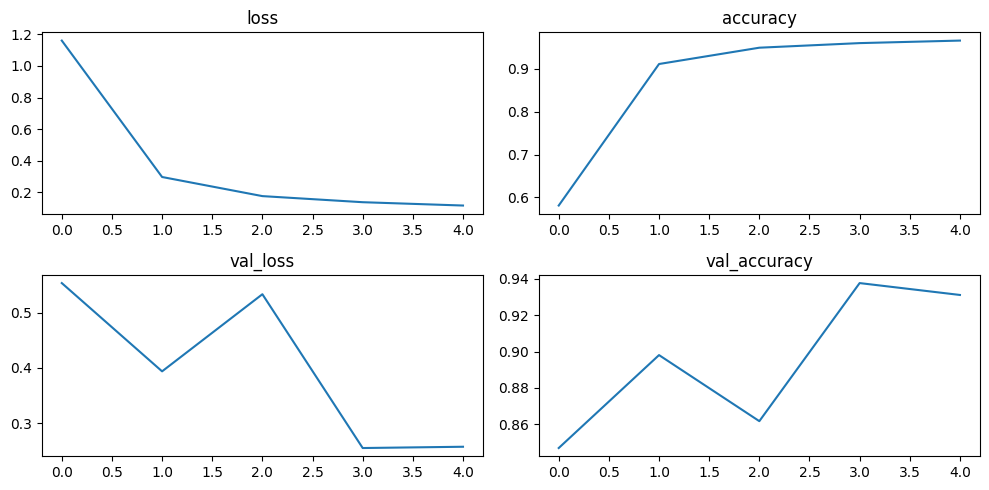

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(history.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(history.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()

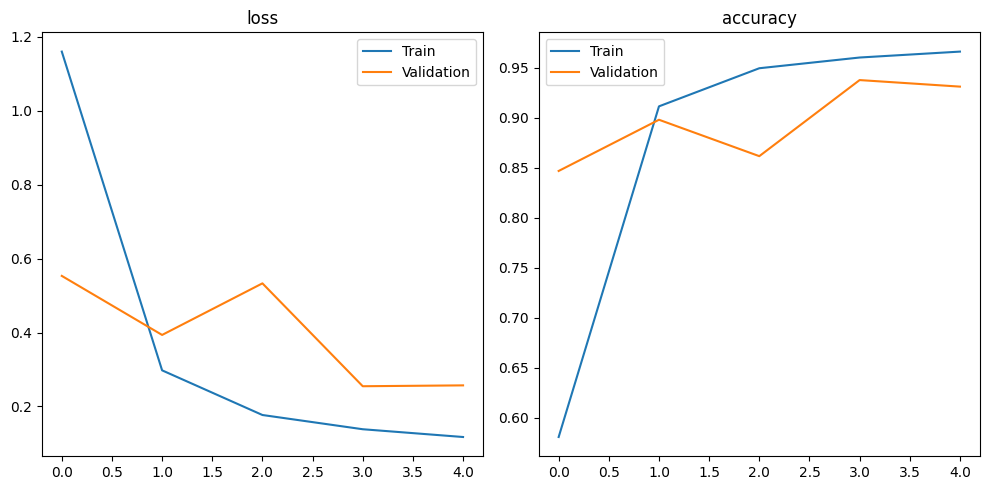

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.title('loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.title('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = []
y_pred = []
i = 0
for x,y in val_x:
    i += 1
    y_true.extend(y)
    temp = model_Effi.predict(x)
    temp = [np.argmax(tmp) for tmp in temp]
    y_pred.extend(temp)

1/1 [==============================] - 0s 31ms/step


In [ ]:
cm = confusion_matrix(y_true, y_pred, normalize='true')

In [ ]:
import pandas as pd
df = pd.DataFrame(cm)
df.head()

,0,1,2,3,4
0,0.980676,0.005636,0.004026,0.007246,0.002415
1,0.001986,0.906481,0.086297,0.001986,0.003250
2,0.000000,0.034562,0.963902,0.000384,0.001152
3,0.024136,0.012394,0.029354,0.893673,0.040444
4,0.000000,0.019802,0.009139,0.003808,0.967251


In [ ]:
df.index = ['call', 'normal','sleep','smoke','yawn']
df.columns = ['call', 'normal','sleep','smoke','yawn']

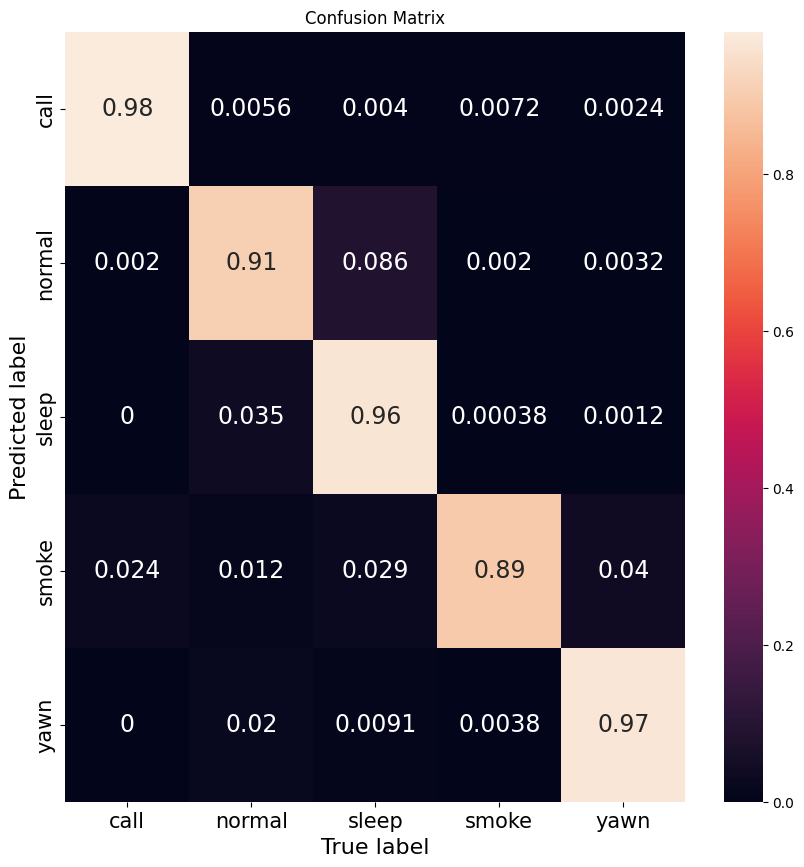

In [ ]:
import seaborn as sns

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(df, annot = True, annot_kws={"size": 17})
ax.set(title = 'Confusion Matrix')
ax.set_xlabel('True label', fontsize=16)
ax.set_ylabel('Predicted label', fontsize=16)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
fig.savefig("confusion_matrix_for_EfficientNetB3")

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ZB/DL_project_2')
model_Effi.save_weights('EfficientNetB3_Transer_Learning_from_300th_layer_epoch5.h5')